<a href="https://www.kaggle.com/code/aisuko/generating-an-image-with-fp16?scriptVersionId=135698296" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Generating by F16 

## Overview
By default, the DiffusionPipeline runs inference with full float32 precision for 50 inference steps. We can speed this up by switching to a lower precision like float16 or running fewer inference steps.

## Preparing

In [8]:
!pip install diffusers["torch",'flax'] transformers

In [9]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [10]:
torch_device

'cuda'

In [11]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

## Loading models

In [12]:
import torch
from diffusers import DiffusionPipeline


model_id="runwayml/stable-diffusion-v1-5"
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [13]:
prompt = "A digital illustration of a steampunk flying machine in the sky with cogs and mechanisms, 4k, detailed, trending in artstation, fantasy vivid colors"

## Generating

  0%|          | 0/50 [00:00<?, ?it/s]

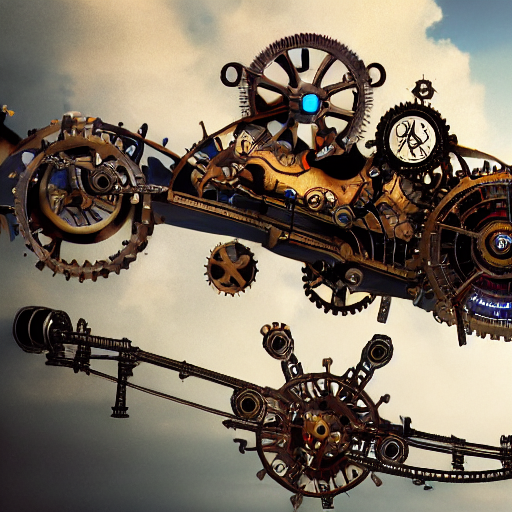

In [14]:
pipeline = pipeline.to(torch_device)
generator = torch.Generator(device=torch_device).manual_seed(0)
image = pipeline(prompt, generator=generator).images[0]
image